In [1]:
import os
import numpy as np
import pprint
os.chdir('C:\\Users\\HADDAM\\Documents\\Python Scripts\\multi_flow_decomp\\')

In [ ]:
# Analytics RL Hystory



id_metric = 0

dict_titles = {0:"reward", 
              1:"fl_val_res", 
              2:"fl_res", 
              3:"transf_res"}

dir_path = "results/simulated/MFDS_vs_RL/RL_history/"

dirList = sorted(os.listdir(dir_path), 
                 key = lambda e : e.split("_")[-1][:-4]) # current directory

all_results = []
for file in dirList:
  fl_path = dir_path+file
  if os.path.isfile(fl_path) == True:
    #print(fl_path)
    raw_results = np.load(fl_path, allow_pickle = True)
    all_results.append(raw_results)

Instance  0 5
Instance  1 5
Instance  2 17
Instance  3 8
Instance  4 19
Instance  5 7
Instance  6 9
Instance  7 6
Instance  8 10
Instance  9 12
Instance  10 6
Instance  11 3
Instance  12 6
Instance  13 3
Instance  14 8
Instance  15 9
Instance  16 10
Instance  17 12
Instance  18 1
Instance  19 7
Instance  20 12
Instance  21 7
Instance  22 6
Instance  23 3
Instance  24 8
Instance  25 7
Instance  26 13
Instance  27 13
Instance  28 11
Instance  29 9
Instance  30 7
Instance  31 5
Instance  32 5
Instance  33 9
Instance  34 8
Instance  35 11
Instance  36 13
Instance  37 6
Instance  38 10
Instance  39 18
Instance  40 11
Instance  41 9
Instance  42 9
Instance  43 11
Instance  44 13
Instance  45 7
Instance  46 19
Instance  47 5
Instance  48 3
Instance  49 7
Instance  50 6
Instance  51 13
Instance  52 8
Instance  53 3
Instance  54 7
Instance  55 5
Instance  56 14
Instance  57 16
Instance  58 4
Instance  59 7
Instance  60 14
Instance  61 9
Instance  62 6
Instance  63 9
Instance  64 8
Instance  65 

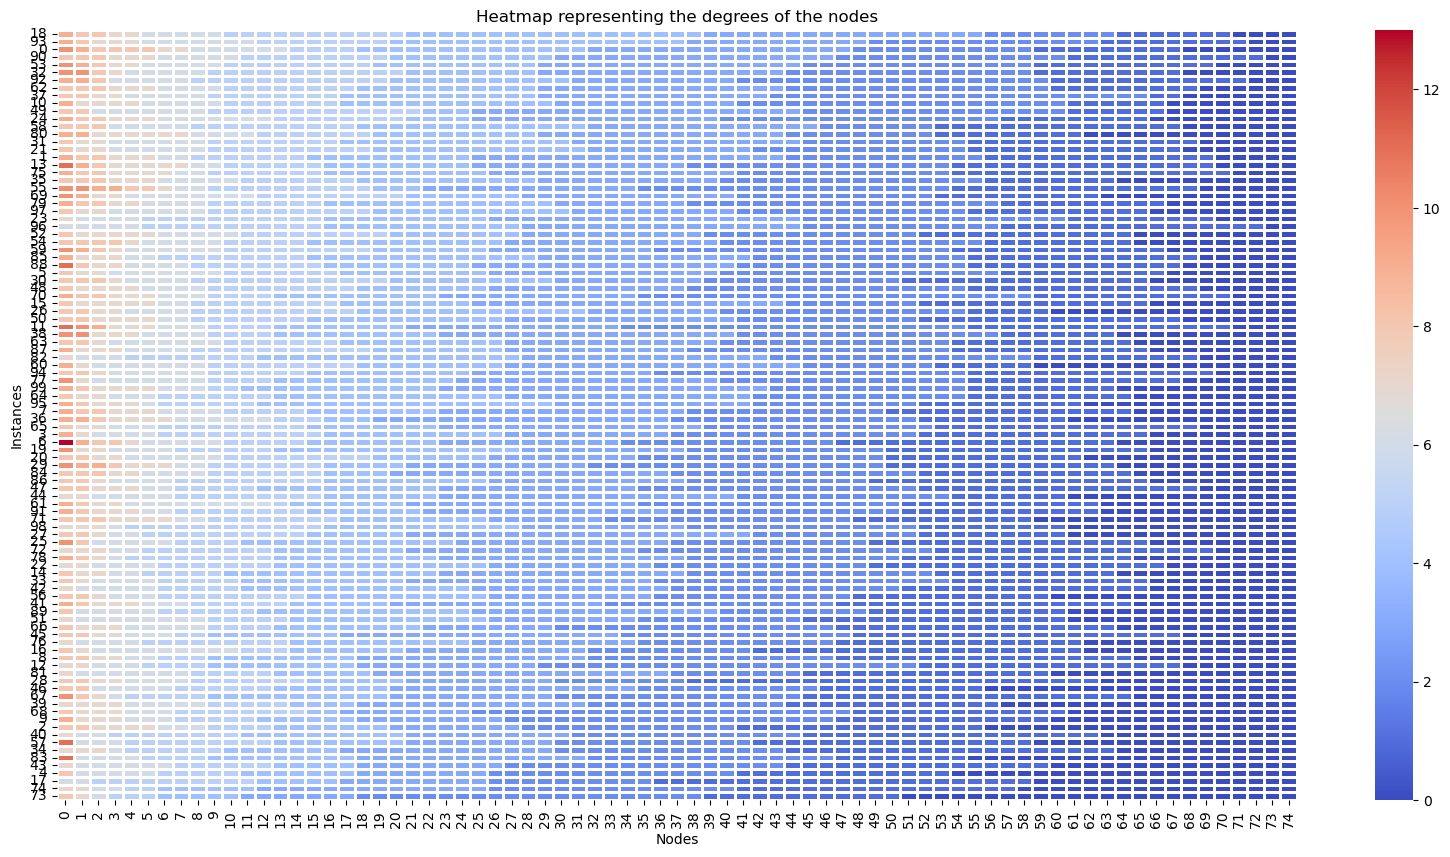

In [ ]:
import os
import numpy as np
import pprint
import seaborn as sns
import matplotlib.pyplot as plt
import sys
os.chdir('C:\\Users\\HADDAM\\Documents\\Python Scripts\\multi_flow_decomp\\')

# Analytics of how the flow is realistic ?
#file_path = "RL_methods/data/old_data/data_instances_nbnodes=80_pairs=20.npy"
file_path = "RL_methods/data/data_instances.npy"
dict_instances = np.load(file_path, allow_pickle = True).flatten()[0]
update_transport_time, update_transition_functions = True, True
ls_instances_processed = []
for ind_instance, upd_transport_time, upd_transition_function in dict_instances:
    if upd_transport_time == update_transport_time and upd_transition_function == update_transition_functions:
        # Fetch the mfd instance
        mfd_instance, original_multi_flow = dict_instances[(ind_instance, upd_transport_time, upd_transition_function)]
        ls_instances_processed.append((ind_instance, 
                                       mfd_instance, 
                                       original_multi_flow))
ls_instances_processed.sort(key = lambda x : x[0])


perfs_means_dict = [(id_inst,
                     [None for _ in range(len(ls_instances_processed[0][1].adj_mat))]) 
                            for id_inst in range(len(ls_instances_processed))]
for instance_infos in ls_instances_processed:
    num_instance, mfd_instance = instance_infos[0], instance_infos[1]
    nb_nodegree = 0
    for node in range(len(mfd_instance.adj_mat)):
        out_degree = sum(mfd_instance.adj_mat[node][:])
        if out_degree == 0:
            in_degree = sum(mfd_instance.adj_mat[prec_node][node] for prec_node in range(len(mfd_instance.adj_mat))) 
            if in_degree == 0: nb_nodegree += 1
        perfs_means_dict[num_instance][1][node] = (node, out_degree)
    print("Instance ", num_instance, nb_nodegree)

perfs_means_dict.sort(key = lambda x : -np.mean([e[1] for e in x[1]]))
for elem in perfs_means_dict: elem[1].sort(key = lambda x : -x[1])

perfs_means_map = [[perfs_means_dict[id_inst][1][v][1] for v in range(len(ls_instances_processed[0][1].adj_mat))]
                                                            for id_inst in range(len(ls_instances_processed))]
        
print("Size of heatmap ", len(perfs_means_map), len(perfs_means_map[0]))


# Create a heatmap
plt.figure(figsize=(20,10))
#plt.tick_params(axis='y', which='major', labelsize=10)
ax = sns.heatmap(perfs_means_map, 
                 annot=False, fmt=".3f", cmap="coolwarm", linewidths=1.0, 
                 xticklabels=list(range(len(perfs_means_map[0]))), 
                 yticklabels=[e[0] for e in perfs_means_dict])

# Set axis labels
ax.set_xlabel("Nodes")
ax.set_ylabel("Instances")
ax.set_title("Heatmap representing the degrees of the nodes")

# Show the plot
plt.show()